# 03 - Project // Web Scraping

https://github.com/LearnPythonWithRune/DataScienceWithPython/blob/main/jupyter/final/03%20-%20Lesson%20-%20Web%20Scraping.ipynb

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
url = 'https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics'
data = pd.read_html(url)

In [32]:
type(data)

list

In [33]:
len(data)

1

In [34]:
data[0].head()

,Year,Source,Revenue,Expenses,Asset rise,Net assets at end of year
0,2022/2023,PDF,"$180,174,103","$169,095,381","$15,619,803","$254,971,336"
1,2021/2022,PDF,"$154,686,521","$145,970,915","$8,173,996","$239,351,532"
2,2020/2021,PDF,"$162,886,686","$111,839,819","$50,861,811","$231,177,536"
3,2019/2020,PDF,"$129,234,327","$112,489,397","$14,674,300","$180,315,725"
4,2018/2019,PDF,"$120,067,266","$91,414,010","$30,691,855","$165,641,425"


In [35]:
fundraising = data[0]

In [36]:
fundraising.dtypes

,0
Year,object
Source,object
Revenue,object
Expenses,object
Asset rise,object
Net assets at end of year,object


In [37]:
fundraising.isnull().any()

,0
Year,False
Source,False
Revenue,False
Expenses,False
Asset rise,False
Net assets at end of year,False


In [38]:
del fundraising['Source']

In [39]:
fundraising.head()

,Year,Revenue,Expenses,Asset rise,Net assets at end of year
0,2022/2023,"$180,174,103","$169,095,381","$15,619,803","$254,971,336"
1,2021/2022,"$154,686,521","$145,970,915","$8,173,996","$239,351,532"
2,2020/2021,"$162,886,686","$111,839,819","$50,861,811","$231,177,536"
3,2019/2020,"$129,234,327","$112,489,397","$14,674,300","$180,315,725"
4,2018/2019,"$120,067,266","$91,414,010","$30,691,855","$165,641,425"


In [40]:
fundraising.dtypes

,0
Year,object
Revenue,object
Expenses,object
Asset rise,object
Net assets at end of year,object


In [41]:
fundraising['Year'] = fundraising['Year'].str[:4]

In [42]:
fundraising.head()

,Year,Revenue,Expenses,Asset rise,Net assets at end of year
0,2022,"$180,174,103","$169,095,381","$15,619,803","$254,971,336"
1,2021,"$154,686,521","$145,970,915","$8,173,996","$239,351,532"
2,2020,"$162,886,686","$111,839,819","$50,861,811","$231,177,536"
3,2019,"$129,234,327","$112,489,397","$14,674,300","$180,315,725"
4,2018,"$120,067,266","$91,414,010","$30,691,855","$165,641,425"


In [43]:
fundraising.set_index('Year', inplace=True)
fundraising.rename(columns={'Net assets at end of year': 'Total assets'}, inplace=True)

In [44]:
fundraising.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2022,"$180,174,103","$169,095,381","$15,619,803","$254,971,336"
2021,"$154,686,521","$145,970,915","$8,173,996","$239,351,532"
2020,"$162,886,686","$111,839,819","$50,861,811","$231,177,536"
2019,"$129,234,327","$112,489,397","$14,674,300","$180,315,725"
2018,"$120,067,266","$91,414,010","$30,691,855","$165,641,425"


In [45]:
fundraising.sort_index(inplace=True)

In [46]:
fundraising.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2003,"$80,129","$23,463","$56,666","$56,666"
2004,"$379,088","$177,670","$211,418","$268,084"
2005,"$1,508,039","$791,907","$736,132","$1,004,216"
2006,"$2,734,909","$2,077,843","$654,066","$1,658,282"
2007,"$5,032,981","$3,540,724","$3,519,886","$5,178,168"


In [47]:
fundraising['Revenue'] = pd.to_numeric(fundraising['Revenue'].str[2:].str.replace(',', ''))

In [48]:
fundraising.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2003,129,"$23,463","$56,666","$56,666"
2004,79088,"$177,670","$211,418","$268,084"
2005,508039,"$791,907","$736,132","$1,004,216"
2006,734909,"$2,077,843","$654,066","$1,658,282"
2007,32981,"$3,540,724","$3,519,886","$5,178,168"


In [49]:
fundraising.dtypes

,0
Revenue,int64
Expenses,object
Asset rise,object
Total assets,object


In [50]:
fundraising['Expenses'] = pd.to_numeric(fundraising['Expenses'].str[2:].str.replace(',', ''))

In [51]:
fundraising.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2003,129,3463,"$56,666","$56,666"
2004,79088,77670,"$211,418","$268,084"
2005,508039,91907,"$736,132","$1,004,216"
2006,734909,77843,"$654,066","$1,658,282"
2007,32981,540724,"$3,519,886","$5,178,168"


In [52]:
fundraising.dtypes

,0
Revenue,int64
Expenses,int64
Asset rise,object
Total assets,object


In [53]:
fundraising['Asset rise'] = pd.to_numeric(fundraising['Asset rise'].str[2:].str.replace(',', ''))

In [54]:
fundraising.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2003,129,3463,6666,"$56,666"
2004,79088,77670,11418,"$268,084"
2005,508039,91907,36132,"$1,004,216"
2006,734909,77843,54066,"$1,658,282"
2007,32981,540724,519886,"$5,178,168"


In [55]:
fundraising.dtypes

,0
Revenue,int64
Expenses,int64
Asset rise,int64
Total assets,object


In [56]:
fundraising['Total assets'] = pd.to_numeric(fundraising['Total assets'].str[2:].str.replace(',', ''))

In [57]:
fundraising.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2003,129,3463,6666,6666
2004,79088,77670,11418,68084
2005,508039,91907,36132,4216
2006,734909,77843,54066,658282
2007,32981,540724,519886,178168


In [58]:
fundraising.dtypes

,0
Revenue,int64
Expenses,int64
Asset rise,int64
Total assets,int64


<Axes: xlabel='Year'>

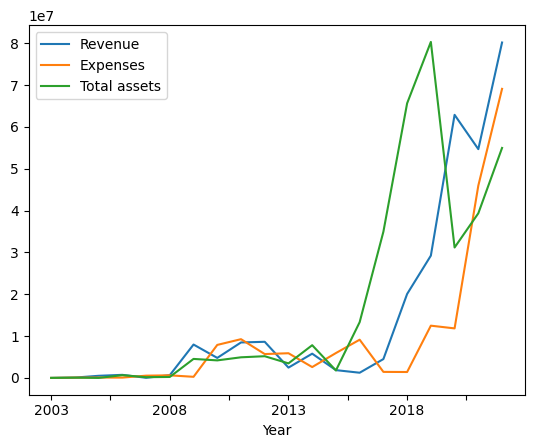

In [59]:
fundraising[['Revenue', 'Expenses', 'Total assets']].plot()

<Axes: xlabel='Year'>

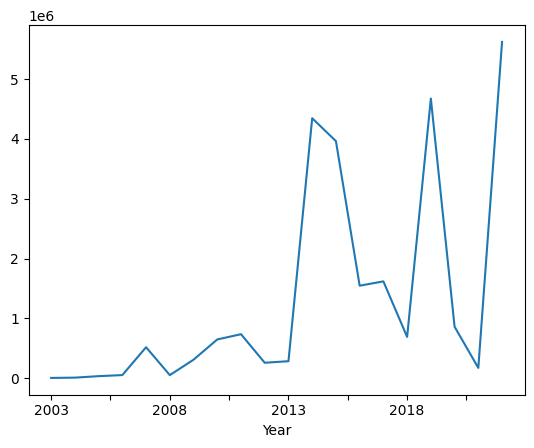

In [60]:
fundraising['Asset rise'].plot()